<a href="https://colab.research.google.com/github/kashish1203/minecrafters/blob/sawyista/Prophet_time_series_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount("/content/MyDrive")

Drive already mounted at /content/MyDrive; to attempt to forcibly remount, call drive.mount("/content/MyDrive", force_remount=True).


In [4]:
df = pd.read_csv("/content/MyDrive/MyDrive/MetroPT3(AirCompressor).csv")

In [5]:
df.head()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,40,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [6]:
 df['timestamp'] = pd.to_datetime(df['timestamp'])

In [7]:
df

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,40,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516943,15169430,2020-09-01 03:59:10,-0.014,8.918,8.906,-0.022,8.918,59.675,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516944,15169440,2020-09-01 03:59:20,-0.014,8.904,8.888,-0.020,8.904,59.600,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516945,15169450,2020-09-01 03:59:30,-0.014,8.890,8.876,-0.022,8.892,59.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516946,15169460,2020-09-01 03:59:40,-0.012,8.876,8.864,-0.022,8.878,59.550,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [8]:
# Format the 'timestamp' column as 'dd-mm-yy'
df['timestamp'] = df['timestamp'].dt.strftime('%d-%m-%y')

# Display the DataFrame
print(df)

         Unnamed: 0 timestamp    TP2    TP3     H1  DV_pressure  Reservoirs  \
0                 0  01-02-20 -0.012  9.358  9.340       -0.024       9.358   
1                10  01-02-20 -0.014  9.348  9.332       -0.022       9.348   
2                20  01-02-20 -0.012  9.338  9.322       -0.022       9.338   
3                30  01-02-20 -0.012  9.328  9.312       -0.022       9.328   
4                40  01-02-20 -0.012  9.318  9.302       -0.022       9.318   
...             ...       ...    ...    ...    ...          ...         ...   
1516943    15169430  01-09-20 -0.014  8.918  8.906       -0.022       8.918   
1516944    15169440  01-09-20 -0.014  8.904  8.888       -0.020       8.904   
1516945    15169450  01-09-20 -0.014  8.890  8.876       -0.022       8.892   
1516946    15169460  01-09-20 -0.012  8.876  8.864       -0.022       8.878   
1516947    15169470  01-09-20 -0.014  8.860  8.848       -0.022       8.864   

         Oil_temperature  Motor_current  COMP  DV_e

In [9]:
from prophet import Prophet

In [10]:
data = df[['timestamp','Motor_current']]
data.columns = ['ds','y']

In [11]:
m = Prophet()
m.fit(data)
future = m.make_future_dataframe(periods=1)
future.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp07b5wz0x/f6hvukpm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp07b5wz0x/k_fhlfdl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12530', 'data', 'file=/tmp/tmp07b5wz0x/f6hvukpm.json', 'init=/tmp/tmp07b5wz0x/k_fhlfdl.json', 'output', 'file=/tmp/tmp07b5wz0x/prophet_model0i3wzusq/prophet_model-20230916111710.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:17:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:35:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
208,2020-12-05
209,2020-12-06
210,2020-12-07
211,2020-12-08
212,2020-12-09


In [12]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
208,2020-12-05,2.286870,-0.563483,5.108769
209,2020-12-06,2.069208,-0.672598,4.774220
210,2020-12-07,2.144530,-0.573405,4.865207
211,2020-12-08,1.993227,-0.691707,4.817653
212,2020-12-09,2.243834,-0.336291,5.023487


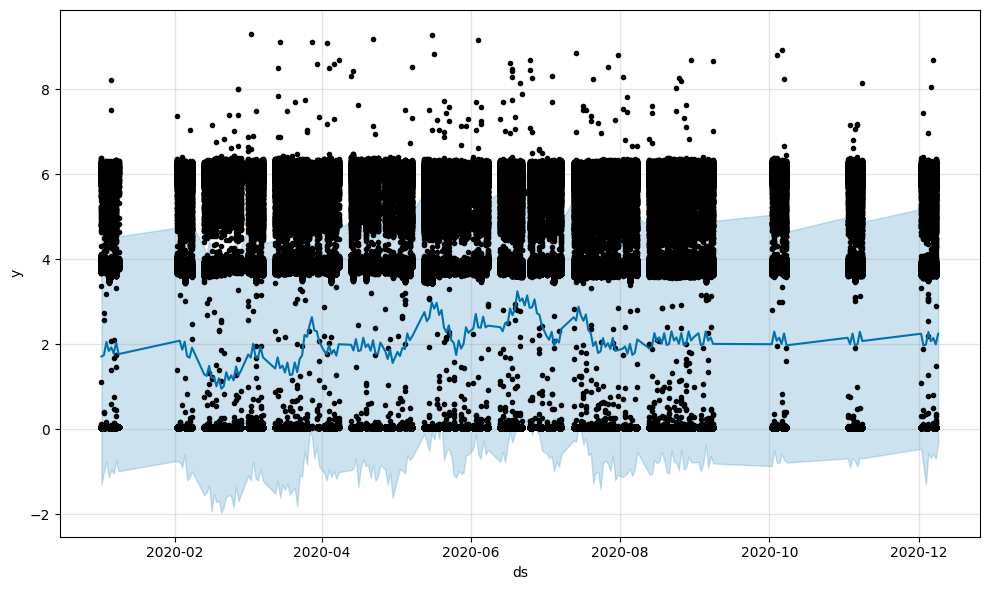

In [13]:
solution = m.plot(forecast)

In [7]:
# Convert 'timestamp' column to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')

# Extract year, month, day, hour, minute, and second
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['second'] = df['timestamp'].dt.second



In [8]:
df

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,...,LPS,Pressure_switch,Oil_level,Caudal_impulses,year,month,day,hour,minute,second
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,...,0.0,1.0,1.0,1.0,2020,2,1,0,0,0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,...,0.0,1.0,1.0,1.0,2020,2,1,0,0,10
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,...,0.0,1.0,1.0,1.0,2020,2,1,0,0,19
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,...,0.0,1.0,1.0,1.0,2020,2,1,0,0,29
4,40,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,...,0.0,1.0,1.0,1.0,2020,2,1,0,0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516943,15169430,2020-09-01 03:59:10,-0.014,8.918,8.906,-0.022,8.918,59.675,0.0425,1.0,...,0.0,1.0,1.0,1.0,2020,9,1,3,59,10
1516944,15169440,2020-09-01 03:59:20,-0.014,8.904,8.888,-0.020,8.904,59.600,0.0450,1.0,...,0.0,1.0,1.0,1.0,2020,9,1,3,59,20
1516945,15169450,2020-09-01 03:59:30,-0.014,8.890,8.876,-0.022,8.892,59.600,0.0425,1.0,...,0.0,1.0,1.0,1.0,2020,9,1,3,59,30
1516946,15169460,2020-09-01 03:59:40,-0.012,8.876,8.864,-0.022,8.878,59.550,0.0450,1.0,...,0.0,1.0,1.0,1.0,2020,9,1,3,59,40


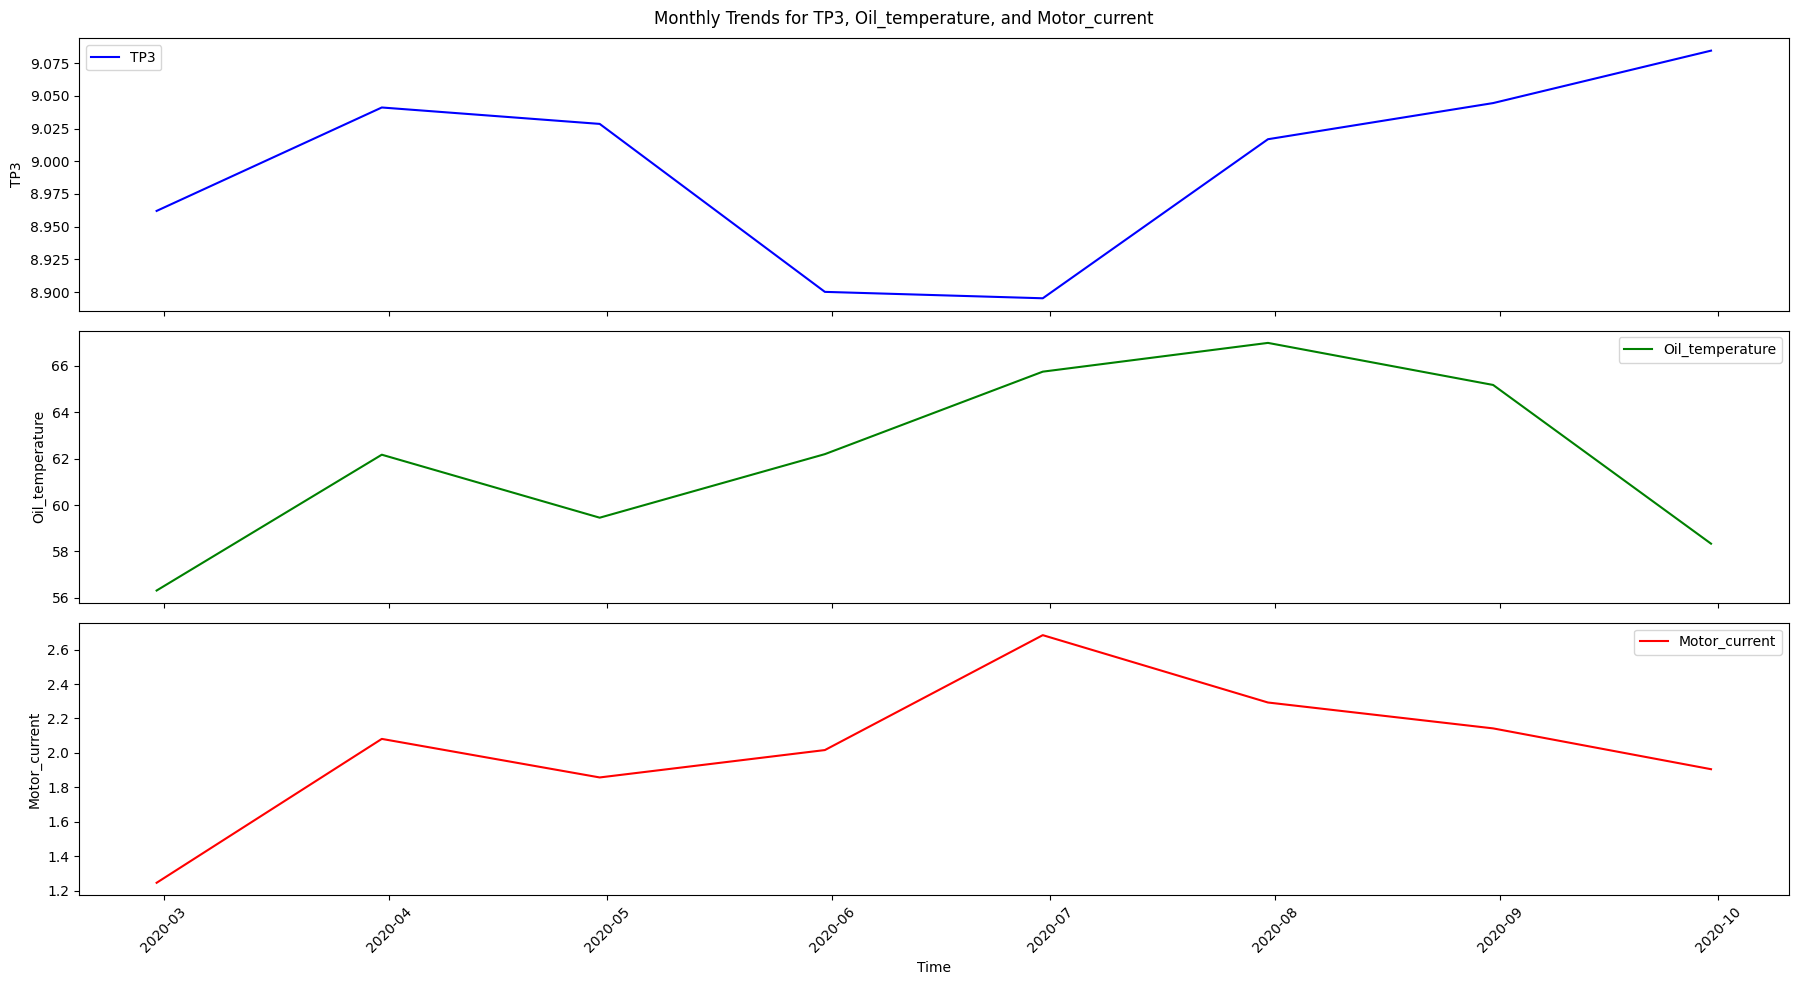

In [9]:
import pandas as pd
import matplotlib.pyplot as plt


# Set the timestamp column as the dataframe's index
df.set_index('timestamp', inplace=True)

# Group data by month
monthly_data = df.resample('M').mean()  # Resampling to monthly frequency, you can use 'D' for daily

# Create subplots for each sensor
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(18, 10), sharex=True)

# Plot TP3 data
axes[0].plot(monthly_data.index, monthly_data['TP3'], label='TP3', color='blue')
axes[0].set_ylabel('TP3')
axes[0].legend()

# Plot Oil_temperature data
axes[1].plot(monthly_data.index, monthly_data['Oil_temperature'], label='Oil_temperature', color='green')
axes[1].set_ylabel('Oil_temperature')
axes[1].legend()

# Plot Motor_current data
axes[2].plot(monthly_data.index, monthly_data['Motor_current'], label='Motor_current', color='red')
axes[2].set_ylabel('Motor_current')
axes[2].legend()

# Set the title and labels
plt.suptitle('Monthly Trends for TP3, Oil_temperature, and Motor_current')
plt.xlabel('Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


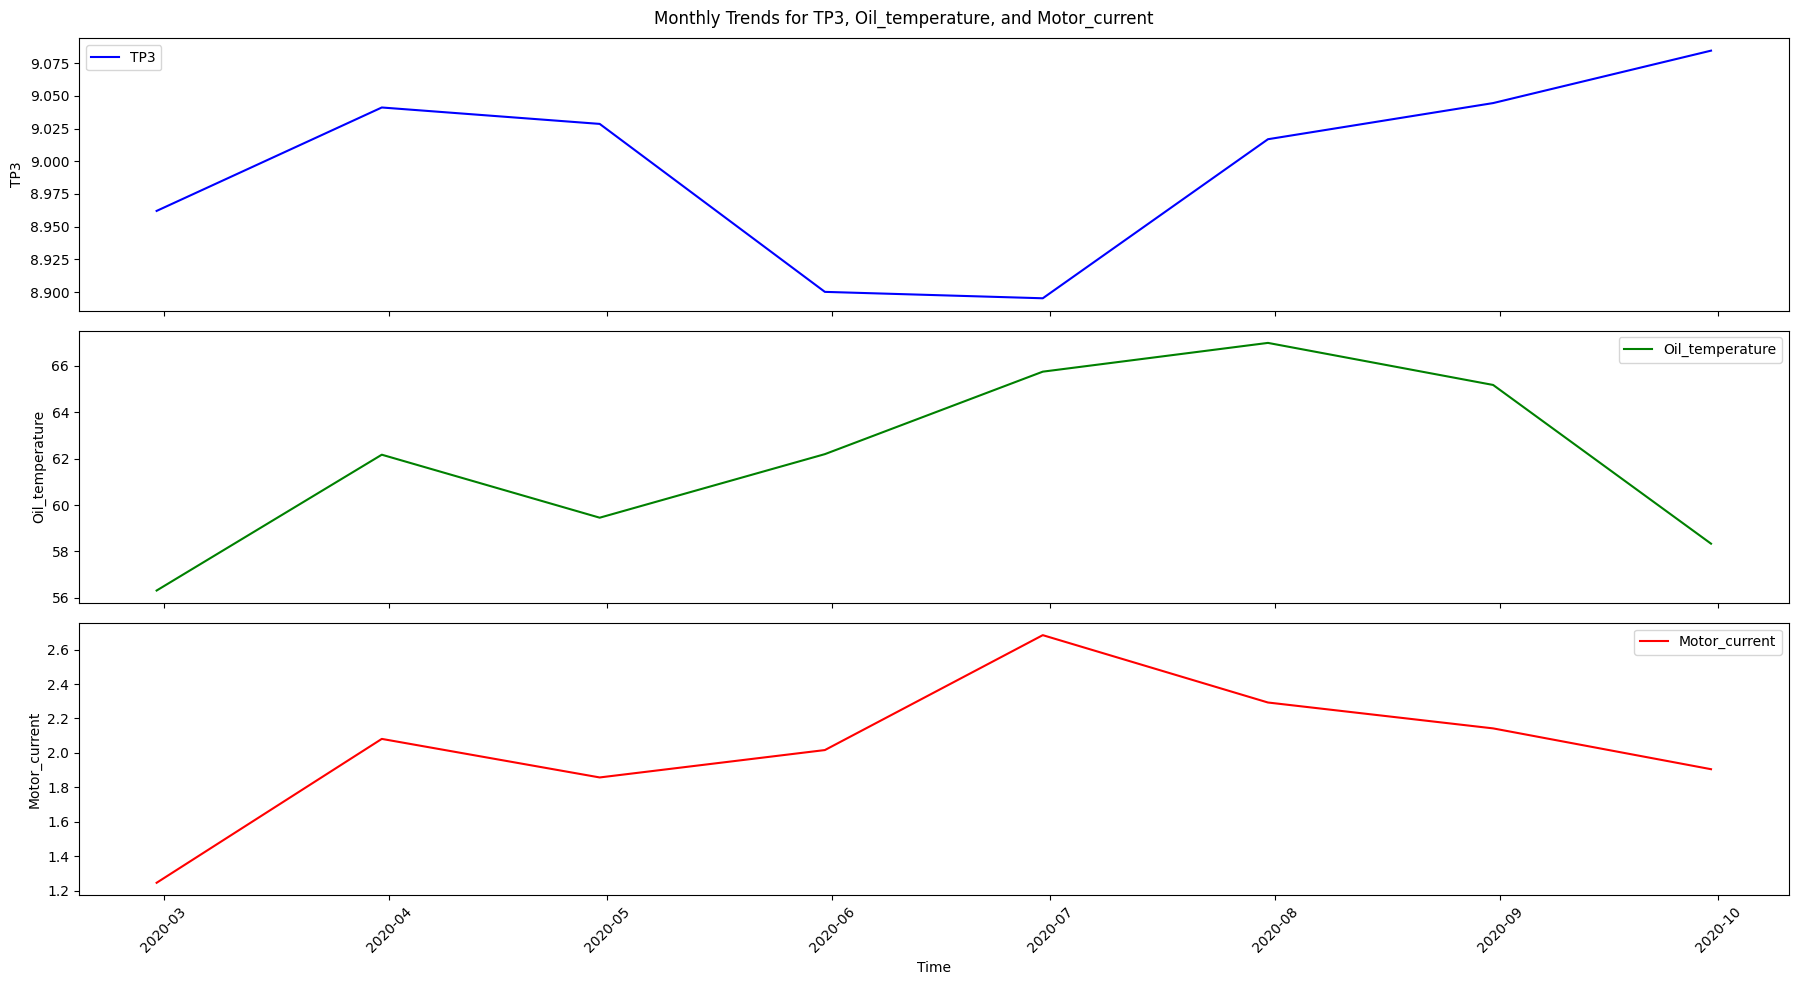

In [11]:
 #Set the timestamp column as the dataframe's index
#df.set_index('timestamp', inplace=True)

# Group data by month
twoweeks_data = df.resample('14D').mean()  # Resampling to monthly frequency, you can use 'D' for daily

# Create subplots for each sensor
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(18, 10), sharex=True)

# Plot TP3 data
axes[0].plot(monthly_data.index, monthly_data['TP3'], label='TP3', color='blue')
axes[0].set_ylabel('TP3')
axes[0].legend()

# Plot Oil_temperature data
axes[1].plot(monthly_data.index, monthly_data['Oil_temperature'], label='Oil_temperature', color='green')
axes[1].set_ylabel('Oil_temperature')
axes[1].legend()

# Plot Motor_current data
axes[2].plot(monthly_data.index, monthly_data['Motor_current'], label='Motor_current', color='red')
axes[2].set_ylabel('Motor_current')
axes[2].legend()

# Set the title and labels
plt.suptitle('Monthly Trends for TP3, Oil_temperature, and Motor_current')
plt.xlabel('Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
# Convert the timestamp column to a datetime object
#df['timestamp'] = pd.to_datetime(df['timestamp'])

# Set the timestamp column as the dataframe's index
#df.set_index('timestamp', inplace=True)

# Calculate the number of 14-day bins
num_bins = int(np.ceil(len(df) / 14))

# Create an empty DataFrame to store the statistics
bin_stats = pd.DataFrame(index=range(num_bins))

# Iterate through the bins and calculate statistics
for i in range(num_bins):
    start_date = df.index.min() + pd.DateOffset(days=i * 14)
    end_date = start_date + pd.DateOffset(days=13)
    bin_data = df[(df.index >= start_date) & (df.index <= end_date)]
    bin_mean = bin_data[['TP3', 'Oil_temperature', 'Motor_current']].mean()
    bin_stats.loc[i, 'Start_Date'] = start_date
    bin_stats.loc[i, 'End_Date'] = end_date
    bin_stats.loc[i, 'TP3_Mean'] = bin_mean['TP3']
    bin_stats.loc[i, 'Oil_temperature_Mean'] = bin_mean['Oil_temperature']
    bin_stats.loc[i, 'Motor_current_Mean'] = bin_mean['Motor_current']

# Create subplots for each sensor
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 8), sharex=True)

# Plot TP3 data
axes[0].plot(bin_stats['Start_Date'], bin_stats['TP3_Mean'], label='TP3', color='blue')
axes[0].set_ylabel('TP3')
axes[0].legend()

# Plot Oil_temperature data
axes[1].plot(bin_stats['Start_Date'], bin_stats['Oil_temperature_Mean'], label='Oil_temperature', color='green')
axes[1].set_ylabel('Oil_temperature')
axes[1].legend()

# Plot Motor_current data
axes[2].plot(bin_stats['Start_Date'], bin_stats['Motor_current_Mean'], label='Motor_current', color='red')
axes[2].set_ylabel('Motor_current')
axes[2].legend()

# Set the title and labels
plt.suptitle('14-Day Binned Trends for TP3, Oil_temperature, and Motor_current')
plt.xlabel('Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()
#

OutOfBoundsDatetime: ignored

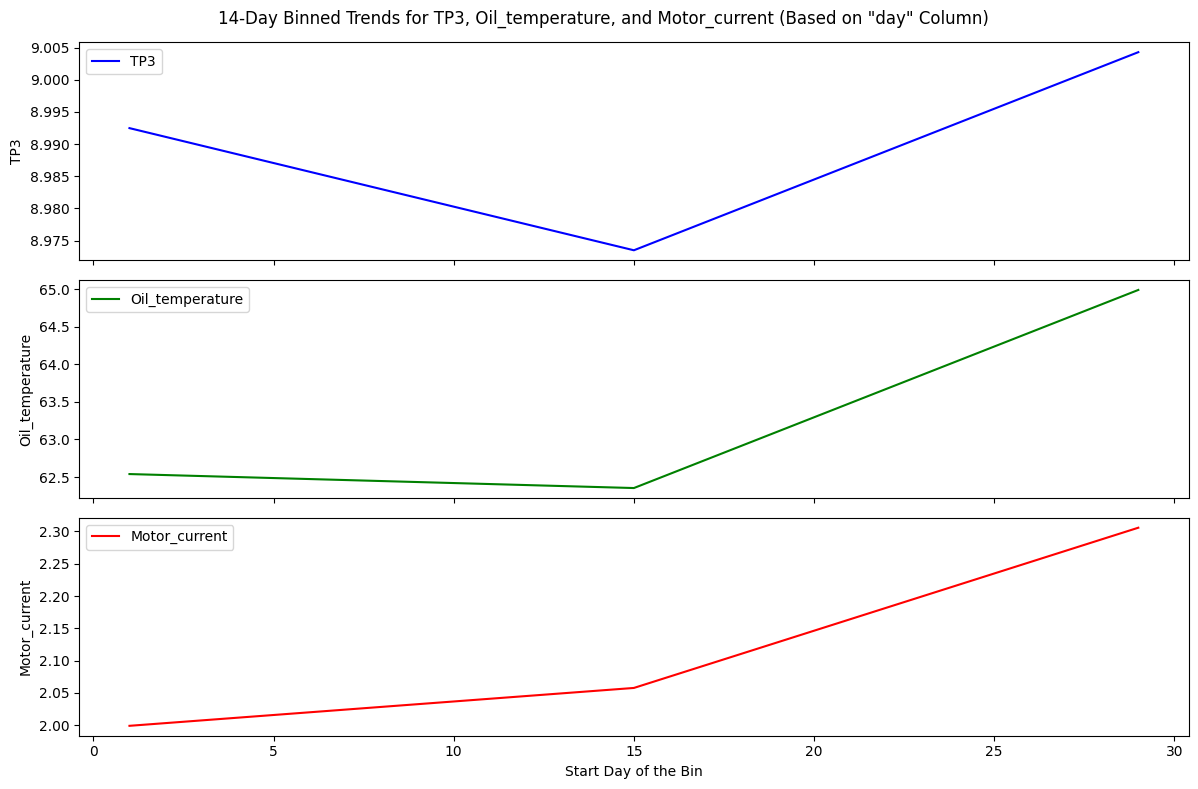

In [15]:
# Calculate the number of 14-day bins
num_bins = len(df) // 14  # Use integer division to ensure the bins don't go out of bounds

# Create an empty DataFrame to store the statistics
bin_stats = pd.DataFrame(index=range(num_bins))

# Iterate through the bins and calculate statistics based on the 'day' column
for i in range(num_bins):
    start_day = i * 14 + 1
    end_day = min((i + 1) * 14, len(df['day']))
    bin_data = df[(df['day'] >= start_day) & (df['day'] <= end_day)]
    bin_mean = bin_data[['TP3', 'Oil_temperature', 'Motor_current']].mean()
    bin_stats.loc[i, 'Start_Day'] = start_day
    bin_stats.loc[i, 'End_Day'] = end_day
    bin_stats.loc[i, 'TP3_Mean'] = bin_mean['TP3']
    bin_stats.loc[i, 'Oil_temperature_Mean'] = bin_mean['Oil_temperature']
    bin_stats.loc[i, 'Motor_current_Mean'] = bin_mean['Motor_current']

# Create subplots for each sensor
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 8), sharex=True)

# Plot TP3 data
axes[0].plot(bin_stats['Start_Day'], bin_stats['TP3_Mean'], label='TP3', color='blue')
axes[0].set_ylabel('TP3')
axes[0].legend()

# Plot Oil_temperature data
axes[1].plot(bin_stats['Start_Day'], bin_stats['Oil_temperature_Mean'], label='Oil_temperature', color='green')
axes[1].set_ylabel('Oil_temperature')
axes[1].legend()

# Plot Motor_current data
axes[2].plot(bin_stats['Start_Day'], bin_stats['Motor_current_Mean'], label='Motor_current', color='red')
axes[2].set_ylabel('Motor_current')
axes[2].legend()

# Set the title and labels
plt.suptitle('14-Day Binned Trends for TP3, Oil_temperature, and Motor_current (Based on "day" Column)')
plt.xlabel('Start Day of the Bin')

# Show the plot
plt.tight_layout()
plt.show()

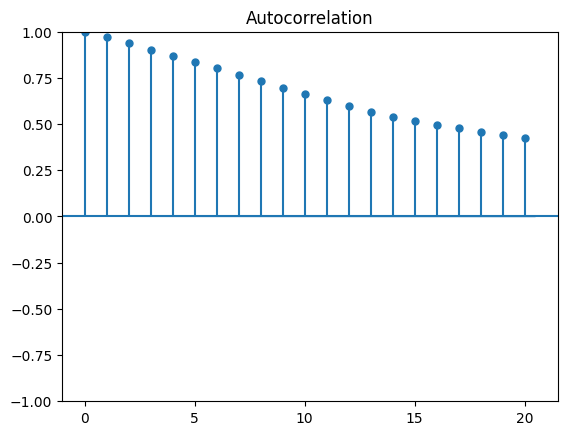

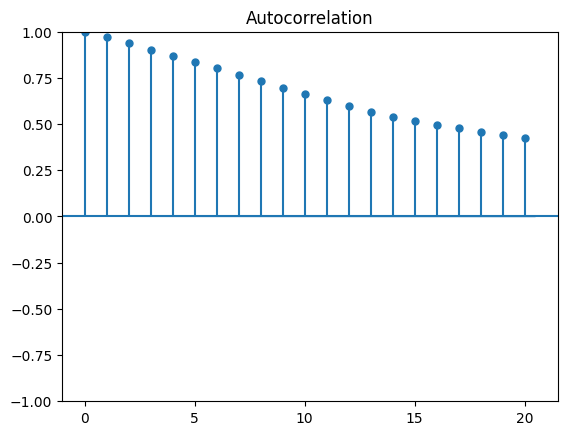

In [8]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Motor_current'], lags=20)

In [8]:
# Sort the DataFrame by the 'timestamp' column (if it's not already sorted)
df = df.sort_values(by='timestamp')

# Apply first-order differencing to the 'Motor_current' column
df['Motor_current_diff'] = df['Motor_current'].diff()

# Display the DataFrame
print(df)


         Unnamed: 0           timestamp    TP2    TP3     H1  DV_pressure  \
0                 0 2020-02-01 00:00:00 -0.012  9.358  9.340       -0.024   
1                10 2020-02-01 00:00:10 -0.014  9.348  9.332       -0.022   
2                20 2020-02-01 00:00:19 -0.012  9.338  9.322       -0.022   
3                30 2020-02-01 00:00:29 -0.012  9.328  9.312       -0.022   
4                40 2020-02-01 00:00:39 -0.012  9.318  9.302       -0.022   
...             ...                 ...    ...    ...    ...          ...   
1516943    15169430 2020-09-01 03:59:10 -0.014  8.918  8.906       -0.022   
1516944    15169440 2020-09-01 03:59:20 -0.014  8.904  8.888       -0.020   
1516945    15169450 2020-09-01 03:59:30 -0.014  8.890  8.876       -0.022   
1516946    15169460 2020-09-01 03:59:40 -0.012  8.876  8.864       -0.022   
1516947    15169470 2020-09-01 03:59:50 -0.014  8.860  8.848       -0.022   

         Reservoirs  Oil_temperature  Motor_current  COMP  DV_eletric  Towe

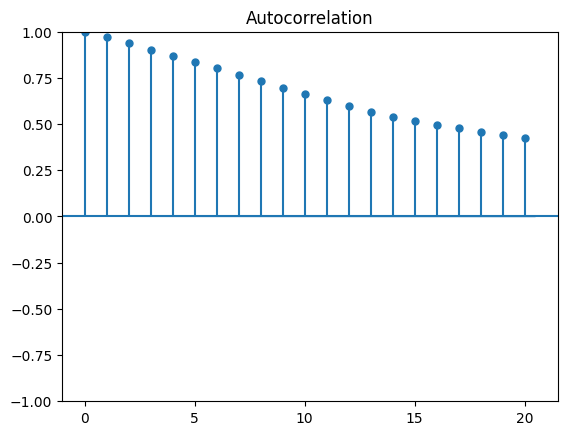

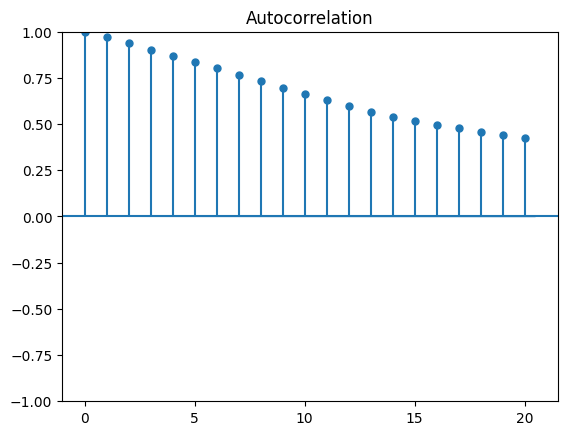

In [9]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Motor_current'], lags=20)

In auto correlation plot we have seen that the lags are gradually decreasing then

In [9]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import kpss

# Generate or load your time series data (replace this with your data)
# For example, let's use a simple array for demonstration purposes.
data = np.random.randn(100)  # Replace with your actual time series data

# Perform the KPSS test
kpss_stat, p_value, lags, crit_values = kpss(data)

# Print the test statistics and p-value
print(f'KPSS Statistic: {kpss_stat}')
print(f'P-value: {p_value}')
print(f'Critical Values: {crit_values}')

# Interpret the results
if p_value < 0.05:
    print('The time series is not stationary (reject the null hypothesis)')
else:
    print('The time series is stationary (fail to reject the null hypothesis)')


KPSS Statistic: 0.1436676875871043
P-value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
The time series is stationary (fail to reject the null hypothesis)


<ipython-input-9-a9b188c95045>:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, p_value, lags, crit_values = kpss(data)


In [7]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
apu_df_result = adfuller(df['Motor_current'])
print(f'ADF Statistic: {apu_df_result[0]}')
print(f'p-value: {apu_df_result[1]}')
